In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



# 1. Data preprocessing

In [29]:
file_path = 'NATOPS_sid20-C_TRAIN_su.csv'  
natops_data = pd.read_csv(file_path)

In [30]:
natops_data

,isTest,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea14,fea15,fea16,fea17,fea18,fea19,fea20,fea21,sid,class
0,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.137255,0.0,0.0,0.0,1,3
1,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.137255,0.0,0.0,0.0,1,3
2,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.137255,0.0,0.0,0.0,1,3
3,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.137255,0.0,0.0,0.0,1,3
4,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.137255,0.0,0.0,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,1,0.215686,0.000000,0.0,0.196078,0.078431,0.156863,0.000000,0.0,0.0,...,0.0,0.0,0.078431,0.098039,0.156863,0.0,0.0,0.0,360,3
18356,1,0.215686,0.000000,0.0,0.196078,0.078431,0.156863,0.000000,0.0,0.0,...,0.0,0.0,0.078431,0.098039,0.156863,0.0,0.0,0.0,360,3
18357,1,0.215686,0.000000,0.0,0.196078,0.078431,0.156863,0.000000,0.0,0.0,...,0.0,0.0,0.078431,0.098039,0.156863,0.0,0.0,0.0,360,3
18358,1,0.215686,0.000000,0.0,0.196078,0.078431,0.156863,0.000000,0.0,0.0,...,0.0,0.0,0.078431,0.098039,0.156863,0.0,0.0,0.0,360,3


In [31]:
# drop unnecessary features
data= natops_data.drop(['isTest', 'sid'], axis=1)

X = data.drop(['class'], axis=1)
y = data['class']

In [32]:
# training/testing split, test size = 20%, use stratified sampling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. KNN Model

In [33]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)


# 3. MLP Model

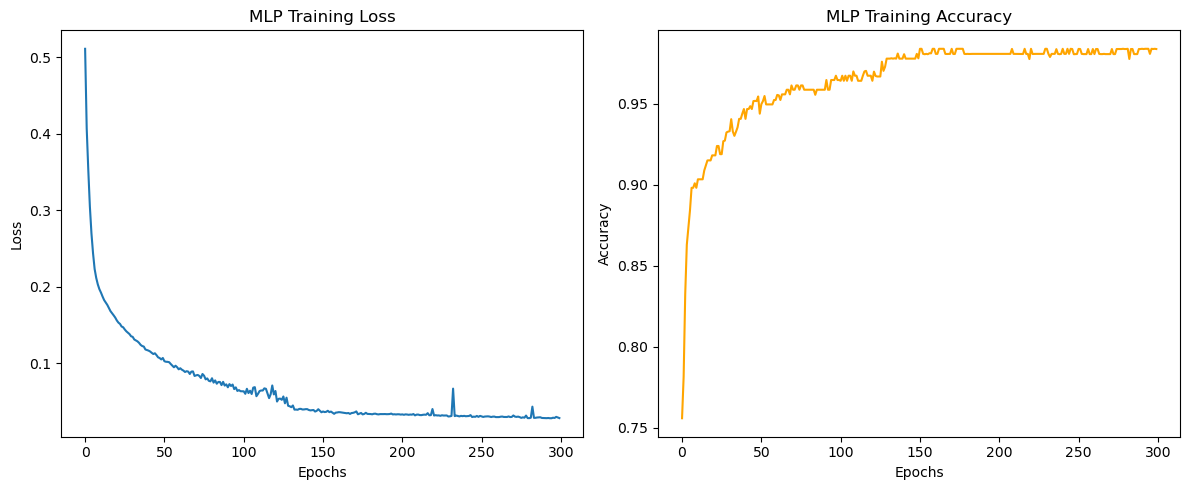

In [34]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1, warm_start=True, random_state=42)

loss_values = []
accuracy_values = []

for i in range(1, 301):  # 300 times
    mlp_model.fit(X_train_scaled, y_train)
    mlp_predictions = mlp_model.predict(X_test_scaled)
    loss = log_loss(y_train, mlp_model.predict_proba(X_train_scaled))
    loss_values.append(loss)
    train_accuracy = mlp_model.score(X_train_scaled, y_train)
    accuracy_values.append(train_accuracy)
    
    
# plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Loss')
plt.title('MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Accuracy', color='orange')
plt.title('MLP Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# 4. Model evaluation

In [36]:
def evaluate_model(y_true, y_pred, y_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr') if y_prob is not None else None
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc, conf_matrix

knn_accuracy, knn_precision, knn_recall, knn_f1, _, knn_conf_matrix = evaluate_model(y_test, knn_predictions)
mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_roc_auc, mlp_conf_matrix = evaluate_model(y_test, mlp_predictions, mlp_model.predict_proba(X_test_scaled))

In [37]:
print("KNN Metrics:")
print("Accuracy:", knn_accuracy, "Precision:", knn_precision, "Recall:", knn_recall, "F1 Score:", knn_f1)
print("Confusion Matrix:\n", knn_conf_matrix)

print("\nMLP Metrics:")
print("Accuracy:", mlp_accuracy, "Precision:", mlp_precision, "Recall:", mlp_recall, "F1 Score:", mlp_f1, "ROC-AUC:", mlp_roc_auc)
print("Confusion Matrix:\n", mlp_conf_matrix)

KNN Metrics:
Accuracy: 0.9844771241830066 Precision: 0.9845976142150304 Recall: 0.9844771241830066 F1 Score: 0.9844600751813357
Confusion Matrix:
 [[606   6   0   0   0   0]
 [ 11 587  14   0   0   0]
 [ 17   9 586   0   0   0]
 [  0   0   0 612   0   0]
 [  0   0   0   0 612   0]
 [  0   0   0   0   0 612]]

MLP Metrics:
Accuracy: 0.9820261437908496 Precision: 0.9825892416818377 Recall: 0.9820261437908497 F1 Score: 0.9820528645933487 ROC-AUC: 0.99974413331055
Confusion Matrix:
 [[600   0  12   0   0   0]
 [ 14 573  25   0   0   0]
 [ 15   0 597   0   0   0]
 [  0   0   0 612   0   0]
 [  0   0   0   0 612   0]
 [  0   0   0   0   0 612]]
